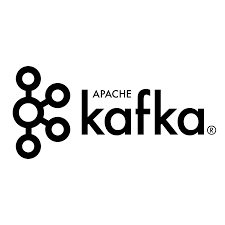

# Ejercicios con Kafka

Este laboratorio usara las tecnologias descritas en los materiales del curso sobre Kafka. Haremos ejecicios para la creación de topics, productores y consumidores.

## Durante esta PEC vamos a cubrir:

* *Ejercicio 1:* Creación de un topic (1 PUNTO)
* *Ejercicio 2:* Hola mundo en Kafka: creación de un productor que escriba en el topic previamente creado y de un consumidor que escriba y muestre los mensajes (1,5 PUNTOS)
* *Ejercicio 3:* Primeros pasos con las particiones. Crearemos un productor que envie los números pares a una partición y los impares a otra y despues los mostraremos con un consumidor. (1,5 PUNTOS)
* *Ejercicio 4:* Entendiendo los offsets (2 PUNTOS)
* *Ejercicio 5:* Adquisición de datos en tiempo real (4 PUNTOS)


> Como referencia a todos los detalles de los metodos que se usan en esta practica se puede consultar, además de la documentación de la asignatura, la documentación oficial de kafka:
> * [Kafka Documentation](https://kafka.apache.org/documentation/)


# Comprobación de que no tengo ningun topic : emadariagalTopic

In [2]:
!kafka-topics --list --zookeeper localhost:2181/kafka

23/12/16 16:32:30 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
23/12/16 16:32:31 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
23/12/16 16:32:31 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
23/12/16 16:32:31 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
23/12/16 16:32:31 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
23/12/16 16:32:31 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
23/12/16 16:32:31 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
23/12/16 16:32:31 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

## Ejercicio 1: Creación de un topic de Kafka (1 PUNTO)

Para empezar, vamos a crear un topic, que será el que utilizaremos en los siguientes ejercicios. El topic tiene que tener las siguientes caracteristicas.

- Nombre: El usuario de la uoc del alumno seguido de la palabla Topic (por ejemplo: garguelloTopic)
- El topic debe tener una sola partición.
- El factor de replicación tiene que ser 1

Debereis rellenar los huecos indicados con FILL IN


In [3]:
!kafka-topics --create --zookeeper localhost:2181/kafka --topic emadariagalTopic --partitions 1 --replication-factor 1

23/12/16 16:33:18 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
23/12/16 16:33:19 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
23/12/16 16:33:19 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
23/12/16 16:33:19 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
23/12/16 16:33:19 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
23/12/16 16:33:19 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
23/12/16 16:33:19 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
23/12/16 16:33:19 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

Al ejecutar el comando, al final del log, debemos ver que se ha creado el topic, pero vamos a comprobarlo:

In [4]:
!kafka-topics --list --zookeeper localhost:2181/kafka

23/12/16 16:33:26 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
23/12/16 16:33:27 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
23/12/16 16:33:27 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
23/12/16 16:33:27 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
23/12/16 16:33:27 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
23/12/16 16:33:27 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
23/12/16 16:33:27 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
23/12/16 16:33:27 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

## Ejercicio 2: Hola mundo en Kafka. (1,5 PUNTOS)

En este ejercicio vamos a crear un productor que envie al topic generado previamente un array generado a partir de valores aleatorios de una distribución normal con media 0 y varianza 1.

Posteriormente crearemos un consumidor que lea el topic y haremos un histograma en el que el que pintaremos los valores recibidos.



In [5]:
from kafka import KafkaProducer
import numpy as np

#Definimos el productor
producer = KafkaProducer(bootstrap_servers='Cloudera02:9092')

#Definimos un array con valores aleatorios de una distribución normal 0,1. Mirad la función np.random.normal
x = np.random.normal(0,1, 1000)

#generamos un bucle que envie los elementos de array anterior uno a uno a nuestro topic
for i in range (0, 1000):
    producer.send('emadariagalTopic', value=bytes(str(x[i]),'utf-8'))

Debemos crear un consumidor que lea el valor del mensaje que hemos producido anteiormente y lo pinte en una grafica, pintaremos un histograma de los datos de la distribución normal que hemos generado. El consumidor, si no lo controlamos, se queda escuchando "para siempre" a la espera de nuevos mensajes, para que esto no suceda utilizamos el parametro consumer_timeout_ms

Datos consumidos: 1000


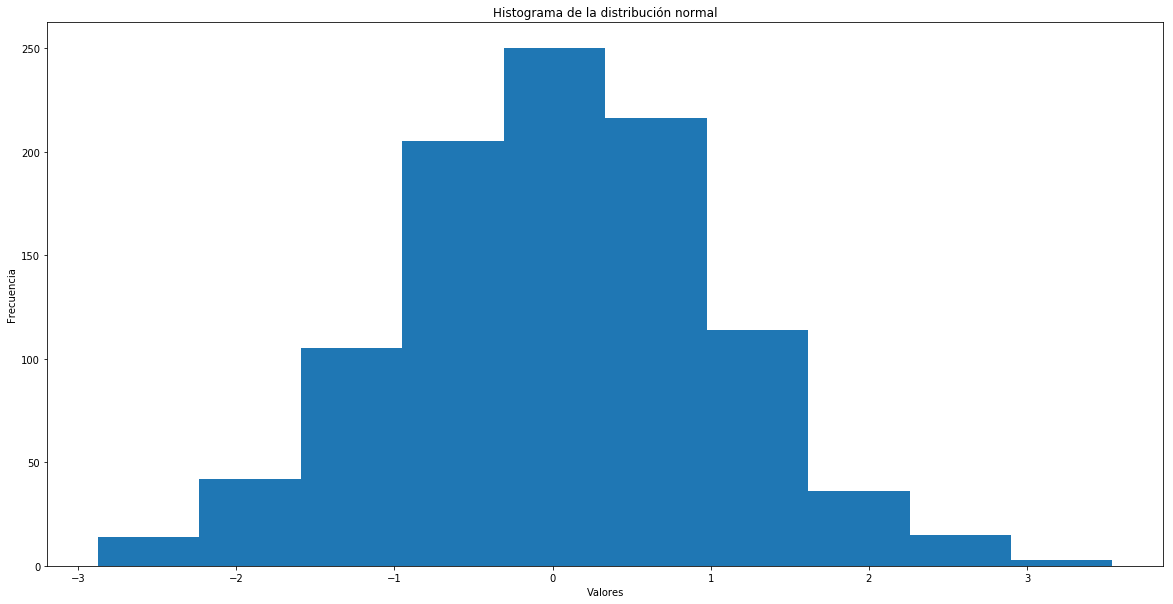

In [6]:
%matplotlib inline
from kafka import KafkaConsumer
import time
import matplotlib.pyplot as plt
import numpy as np

#Creamos la figura para despues pintar el scatter plot
fig, ax1 = plt.subplots(figsize=(20,10))

#Definimos una lista vacia en la que luego almacenaremos los valores
data = []
#Definimos el consumidor
consumer = KafkaConsumer('emadariagalTopic',bootstrap_servers='Cloudera02:9092',auto_offset_reset='smallest',consumer_timeout_ms = 10000)

#Consumimos los mensajes y los almacenamos en una lista
for message in consumer:
    data.append(float(message.value.decode('utf-8')))

print('Datos consumidos:', len(data))

# Pintamos el histograma
# Crear el histograma
plt.hist(data)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de la distribución normal')

# Mostrar el histograma
plt.show()

## Ejercicio 3: Aprendiendo a usar particiones (1.5 PUNTOS)

En este ejercicio vamos a trabajar con las particiones de un topic. La primera parte del ejercicio son dos preguntas teoricas sobre las particiones

**¿Cual es la diferencia entre partición y factor de replicación?**

**Respuesta:** 

* **Particion:** permite dividir o fragmentar en partes un Topic. Si la particion es igual a 1, el topic no está particionado.


* **Factor de replicación:** es el número de veces que una particion esta duplicada en varios servidores(brokers)

**¿Cuál es el principal objetivo del particionamiento de los topics?**

**Respuesta:**

* **Escalabilidad Horizontal:** Las particiones son la forma que tiene Kafka de proveer redundancia y escalabilidad ya que cada partición puede estar alojada en un servidor diferente.

* **Tolerancia a fallos:** Un topic con factor de replicación N, tolerará N-1 fallos en los servidores sin que se pierdan mensajes.

* **Ordenación:** Cada partición en Kafka mantiene el orden de los mensajes en el orden publicado y permite garantizar el orden secuencial de los mensajes dentro de una partición específica.

* **Pararalismo:** Las particiones permiten que se puedan procesar en paralelo un mayor número de mensajes.

En este ejercicio vamos a necesitar un topic particionado, si recordais en el primer ejercicio creamos un topic con una unica partición, por lo que ahora vamos a crear un topic que tener las siguientes caracteristicas.

- Nombre: El usuario de la uoc del alumno seguido de la palabla Topic (por ejemplo: garguelloTopic). Antes tendreis que borrarlo, ya que lo hemos creado en los ejercicios anteriores con otra configuración
- El topic debe tener 2 particiones
- El factor de replicación tiene que ser 1

Debereis rellenar los huecos indicados con FILL IN

In [9]:
#Borramos el topic creado en el ejercicio 1
!kafka-topics --delete --zookeeper localhost:2181/kafka --topic emadariagalTopic

23/12/16 16:36:07 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
23/12/16 16:36:08 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
23/12/16 16:36:08 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
23/12/16 16:36:08 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
23/12/16 16:36:08 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
23/12/16 16:36:08 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
23/12/16 16:36:08 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
23/12/16 16:36:08 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

In [10]:
!kafka-topics --list --zookeeper localhost:2181/kafka

23/12/16 16:36:18 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
23/12/16 16:36:19 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
23/12/16 16:36:19 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
23/12/16 16:36:19 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
23/12/16 16:36:19 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
23/12/16 16:36:19 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
23/12/16 16:36:19 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
23/12/16 16:36:19 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

In [11]:
#Creamos otra vez el tocis con las especificaciones del enunciado
!kafka-topics --create --zookeeper localhost:2181/kafka --topic emadariagalTopic --partitions 2 --replication-factor 1

23/12/16 16:36:40 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
23/12/16 16:36:40 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
23/12/16 16:36:40 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
23/12/16 16:36:40 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
23/12/16 16:36:40 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
23/12/16 16:36:40 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
23/12/16 16:36:40 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
23/12/16 16:36:40 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

Vamos a verificar que el topic se ha creado correctamente, para ello vamos a utilizar el parametro --describe

In [12]:
!kafka-topics --zookeeper localhost:2181/kafka --describe --topic emadariagalTopic

23/12/16 16:36:53 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
23/12/16 16:36:53 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
23/12/16 16:36:53 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
23/12/16 16:36:53 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
23/12/16 16:36:53 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
23/12/16 16:36:53 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
23/12/16 16:36:53 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
23/12/16 16:36:53 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

Si la creación se ha realizado correctamente, veremos nuestro topic con dos particiones, la 0 y la 1.

Ahora vamos a crear un productor que a partir de la lista de los 100 primeros numeros naturales, envie los pares a la partición 0 y los impares a la 1.

In [13]:
from kafka import KafkaProducer
import numpy as np

#Definimos el productor
producer = KafkaProducer(bootstrap_servers='Cloudera02:9092')

#bucle que enviará los numeros pares a la partición 0 y los impares a la 1
for i in range (1, 100):
    if i%2==0:
        producer.send('emadariagalTopic',partition=0, value=bytes(str(i),'utf-8'))
    else:
        producer.send('emadariagalTopic',partition=1, value=bytes(str(i),'utf-8'))

Por último creamos un consumidor que consuma estos mensajes y los muestre con la funcion "print". El consumidor, si no lo controlamos, se queda escuchando "para siempre" a la espera de nuevos mensajes, por lo tanto para evitarlo utilizad el parametro consumer_timeout_ms

In [14]:
from kafka import KafkaConsumer

#Definimos el consumidor, sin el parametro auto_offset_reset='smallest' sólo leeria los nuevos mensajes en el topic no todos los que se crearon.
consumer = KafkaConsumer('emadariagalTopic',bootstrap_servers='Cloudera02:9092',auto_offset_reset='smallest', consumer_timeout_ms =10000)

#Bucle para imprimir en pantalla todos los mensajes, este bucle al minuto acabará
for message in consumer:
    print(message)

ConsumerRecord(topic='emadariagalTopic', partition=1, offset=0, timestamp=1702741024876, timestamp_type=0, key=None, value=b'1', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=1, serialized_header_size=-1)
ConsumerRecord(topic='emadariagalTopic', partition=1, offset=1, timestamp=1702741024876, timestamp_type=0, key=None, value=b'3', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=1, serialized_header_size=-1)
ConsumerRecord(topic='emadariagalTopic', partition=1, offset=2, timestamp=1702741024876, timestamp_type=0, key=None, value=b'5', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=1, serialized_header_size=-1)
ConsumerRecord(topic='emadariagalTopic', partition=1, offset=3, timestamp=1702741024876, timestamp_type=0, key=None, value=b'7', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=1, serialized_header_size=-1)
ConsumerRecord(topic='emadariagalTopic', partition=1, offset=4, timestam

**¿Los mensajes han llegado correctamente a sus particiones? ¿Qué significa la información que muestra el mensaje?**

**Respuesta:**

Sí, los mensajes han llegado correctamente  a sus particiones.

Por ejemplo, este es el ultimo mensaje enviado impar 99 y el offset es 49:

ConsumerRecord(topic='emadariagalTopic', partition=1, offset=49, timestamp=1702734265962, timestamp_type=0, key=None, value=b'99', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=2, serialized_header_size=-1)


Otro ejemplo, este es el ultimo mensaje enviado par 98 y el offset es 48:

ConsumerRecord(topic='emadariagalTopic', partition=0, offset=48, timestamp=1702734265962, timestamp_type=0, key=None, value=b'98', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=2, serialized_header_size=-1)


Se observa que los mensajes cuyo valor es par estan en la particion 0 y los imporares en la particion 1. Además, se observa que cada mensaje tiene un offset, un número que indica la posición del mensaje en la secuencia de mensajes de la partición.

## Ejercicio 4: Entendiendo los offsets (2 PUNTOS)

En este ejercicio vamos a utilizar el topic creado en el ejercicio anterior para trabajar con los offsets

- Mostrad el offset de las dos particiones del topic creado en el ejercicio anterior (por ejemplo: garguelloTopic)
- Volved a ejecutar el productor del ejercicio anterior ¿qué ocurre con los offsets?
- Cread un consumidor que empiece a leer a partir de un offset especifico (por ejemplo a partir del 30).

Debereis rellenar los huecos indicados con FILL IN

Mostrad el offset de las dos particiones de topic creado en el ejericicio anterior

In [ ]:
from kafka import SimpleClient
from kafka.protocol.offset import OffsetRequest, OffsetResetStrategy
from kafka.common import OffsetRequestPayload

client = SimpleClient('Cloudera02:9092')
#<FILL IN>

**Respuesta:** 

La clase SimpleClient esta en deshuso. Se opta por resolver el apartado de la siguiente forma:

In [17]:
from kafka import KafkaConsumer

#Definimos el consumidor, sin el parametro auto_offset_reset='smallest' sólo leeria los nuevos mensajes en el topic no todos los que se crearon.
consumer = KafkaConsumer('emadariagalTopic',bootstrap_servers='Cloudera02:9092',auto_offset_reset='smallest', consumer_timeout_ms =10000)

# Se obtiene las particiones del topic
partitions = consumer.partitions_for_topic('emadariagalTopic')


In [18]:
partitions

{0, 1}

In [19]:
from kafka import TopicPartition

# Obtener los offsets para las particiones
offsets = consumer.end_offsets([TopicPartition('emadariagalTopic', p) for p in partitions])

In [20]:
offsets

{TopicPartition(topic='emadariagalTopic', partition=0): 49,
 TopicPartition(topic='emadariagalTopic', partition=1): 50}

In [21]:
# Imprimir los offsets
for partition, offset in offsets.items():
    print("Partición {}: Offset = {}".format(partition,offset))

Partición TopicPartition(topic='emadariagalTopic', partition=1): Offset = 50
Partición TopicPartition(topic='emadariagalTopic', partition=0): Offset = 49


Ejecutad otra vez el **productor** del ejercicio anterior y volved a mirad los offsets. ¿Qué ha pasado con ellos? ¿Han cambiado?

In [23]:
#Se ejecuta nuevamente el productor
producer = KafkaProducer(bootstrap_servers='Cloudera02:9092')

#bucle que enviará los numeros pares a la partición 0 y los impares a la 1
for i in range (1, 100):
    if i%2==0:
        producer.send('emadariagalTopic',partition=0, value=bytes(str(i),'utf-8'))
    else:
        producer.send('emadariagalTopic',partition=1, value=bytes(str(i),'utf-8'))

In [24]:
# Obtener nuevamente los offsets para las particiones
offsets = consumer.end_offsets([TopicPartition('emadariagalTopic', p) for p in partitions])
# Imprimir los offsets
for partition, offset in offsets.items():
    print("Partición {}: Offset = {}".format(partition,offset))

Partición TopicPartition(topic='emadariagalTopic', partition=1): Offset = 100
Partición TopicPartition(topic='emadariagalTopic', partition=0): Offset = 98


**Respuesta:**

**Si, hay más mensajes. Se observa:**

**1) Que si se envian nuevamente los mensajes  generados anteriormente se duplican la cantidad de mensajes.**

**2) Que los offsets de los mensajes que ya estaban en el topic no cambian, y además,se generan nuevos mensajes y offsets, apartir del último valor de offset que había creado.**

Cread un consumidor que empiece a leer a partir de un offset especifico (por ejemplo a partir del 30).

In [25]:
!kafka-console-consumer --bootstrap-server Cloudera02:9092 --topic emadariagalTopic --partition 0 --offset 30

23/12/16 16:38:19 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
23/12/16 16:38:19 INFO consumer.ConsumerConfig: ConsumerConfig values: 
	auto.commit.interval.ms = 5000
	auto.offset.reset = latest
	bootstrap.servers = [Cloudera02:9092]
	check.crcs = true
	client.dns.lookup = default
	client.id = 
	connections.max.idle.ms = 540000
	default.api.timeout.ms = 60000
	enable.auto.commit = false
	exclude.internal.topics = true
	fetch.max.bytes = 52428800
	fetch.max.wait.ms = 500
	fetch.min.bytes = 1
	group.id = console-consumer-43138
	heartbeat.interval.ms = 3000
	interceptor.classes = []
	internal.leave.group.on.close = true
	isolation.level = read_uncommitted
	key.deserializer = class org.apache.kafka.common.serialization.ByteArrayDeserializer
	max.partition.fetch.bytes = 1048576
	max.poll.interval.ms = 300000
	max.poll.records = 500
	metadata.max.age.ms = 300000
	metric.reporters = []
	metrics.num.samples = 2
	metrics.recording.level = INFO
	metr

## Ejercicio 5: Adquisición de datos en tiempo real (4 puntos)

La información AIS (Automatic Identification System) es un sistema automático de identificación utilizado en el ámbito marítimo para mejorar la seguridad y la gestión del tráfico de buques. Este sistema permite que los barcos intercambien información de manera automática y continua, lo que ayuda a prevenir colisiones y mejora la conciencia situacional para los operadores marítimos y las autoridades responsables.

Las embarcaciones equipadas con transpondedores AIS emiten información, que puede incluir:

1. Identificación del Buque: Nombre, número IMO (Organización Marítima Internacional), y el indicativo de llamada del buque.

2. Datos de Posición: Latitud y longitud exactas de la embarcación.

3. Curso y Velocidad: Dirección y velocidad actual del buque.

4. Estado de Navegación: Indicación de si el buque está anclado, en movimiento, atracado, etc.

5. Datos de Navegación Adicional: Información sobre la eslora, manga, calado y tipo de carga del buque.

Esta información se transmite a otros barcos cercanos, así como a estaciones en tierra y satélites. Las autoridades portuarias y las agencias de control de tráfico marítimo también utilizan la información AIS para monitorear y gestionar el tráfico en áreas específicas.

La implementación del sistema AIS es obligatoria para la mayoría de los buques comerciales y muchos buques más grandes, lo que contribuye significativamente a la seguridad y eficiencia en la navegación marítima.

Es esta parte de la práctica vamos a trabajar la adquisición de datos en tiempo real de https://kystverket.no/en/navigation-and-monitoring/ais/access-to-ais-data/. Esta web de La Administración Costera de Noruega proporciona datos AIS en tiempo real, ya sea como datos sin procesar o información de tráfico en línea mostrada en gráficos.
Para realizar este ejercicio no es necesario registrarse en ningún sistema.


Los datos AIS están disponibles en la siguiente dirección IP: 153.44.253.27, puerto 5631. Para leerlos vamos a usar un socket y almacenar los datos recibidos. Posteriormente enviaremos estos datos a un Productor de Kafka y finalmente los consumiremos.

In [30]:
import socket

TCP_IP = "153.44.253.27"
TCP_PORT = 5631
BUFFER_SIZE = 1024

s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect((TCP_IP, TCP_PORT))
print("connected: ", s)

connected:  <socket.socket fd=69, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('213.73.35.120', 44410), raddr=('153.44.253.27', 5631)>


In [31]:
data = s.recv(BUFFER_SIZE)
s.close()
print("received data: ", data)

received data:  b'!BSVDM,1,1,,B,13m`4H?000PGoFrRGinKl33hP5rH,0*0E\r\n\\s:2573243,c:1702741136*08\\!BSVDM,1,1,,A,33n4kDUP00PFDEFRttl>4?wh2E2J,0*05\r\n\\s:2573415,c:1702741136*0D\\!BSVDM,1,1,,A,13oV8F00000uvDHV<Ho=U9Qh0<0L,0*10\r\n\\s:2573245,c:1702741136*0E\\!BSVDM,1,1,,B,H3n1ap0PTh@D000000000000000,2*63\r\n\\s:2573485,c:1702741136*04\\!BSVDM,1,1,,B,13mknB001LQ>=v@WCoeWlFCh28QE,0*5B\r\n\\s:2573405,c:1702741136*0C\\!BSVDM,2,1,3,A,53m;Jo800000hSG;GJ0Dh@u84@v22222222222160@=4340Ht554QCPKlQCT,0*7B\r\n\\s:2573405,c:1702741136*0C\\!BSVDM,2,2,3,A,knKliC5PADP,2*36\r\n\\s:2573415,c:1702741137*0C\\!BSVDM,1,1,,A,13moDPP000PvfDlV@g2nKEch00Rt,0*2D\r\n\\s:2573305,c:1702741137*0A\\!BSVDM,1,1,,B,13A:f000000L3gLSkjrLEmmh0D2;,0*4B\r\n!BSVDM,1,1,,A,ENjV3Rg0`bPQbV::a2hI00000000;otfA<5Vh1088;v010,4*32\r\n\\s:2573415,c:1702741137*0C\\!BSVDM,1,1,,B,33oaS650000qu2BV6hmKV8Oh0E0r,0*46\r\n\\s:2573315,c:1702741137*0B\\!BSVDM,2,1,7,A,53mr57800000hOCKK@0I8DTMEA@00000000000160H<16400000000000000,0*24\r\n\\s:2573315,c

Salida de ejemplo:

`b'\\s:2573238,c:1702363269*09\\!BSVDM,1,1,,B,13n0fP0P010HWt6RJch4EgvD085O,0*1F\r\n
\\s:2573345,c:1702363269*02\\!BSVDM,1,1,,A,33m8pc5P000kfF2TNSmP04J:0000,0*55\r\n
\\s:2573238,c:1702363269*09\\!BSVDM,1,1,,B,33m<LJ50000HE8>RSm?5nV4B0Dsb,0*18\r\n
`

El servidor nos devuelve un mensaje con varios campos separados por comas, la documentación sobre los campos se puede encontrar aqui https://arundaleais.github.io/docs/ais/ais_decoder.html
https://gpsd.gitlab.io/gpsd/AIVDM.html#_types_1_2_and_3_position_report_class_a
https://docs.safe.com/fme/html/FME-Form-Documentation/FME-ReadersWriters/ais/Feature_Representation.htm
.A nosotros nos interesa el septimo campo que es la codificación IEC 62320-1 del mensaje. Si descodificamos el primer ejemplo veremos un json:

In [32]:
#!pip install libais

In [33]:
import ais
ais.decode("33n4kDUP00PFDEFRttl>4?wh2E2J", 0)

{'cog': 360.0,
 'id': 3,
 'keep_flag': False,
 'mmsi': 258028370,
 'nav_status': 5,
 'position_accuracy': 1,
 'raim': True,
 'repeat_indicator': 0,
 'rot': -731.386474609375,
 'rot_over_range': True,
 'slot_increment': 5385,
 'slots_to_allocate': 5,
 'sog': 0.0,
 'spare': 0,
 'special_manoeuvre': 0,
 'sync_state': 0,
 'timestamp': 56,
 'true_heading': 511,
 'x': 4.875378333333333,
 'y': 61.08365333333333}

Este json es el que queremos enviar a Kafka. Ahora vamos a crear un programa en Python para poder enviar los mensajes recibidos a nuestro broker de Kafka.

**NOTA: debéis usar el mismo tópico usando antes, asegurandose de que no contiene mensajes anteriores. Para que no se lien los datos entre ejercicios podéis borrar y crear el tópico otra vez.**

In [34]:
!kafka-topics --delete --zookeeper localhost:2181/kafka --topic emadariagalTopic

23/12/16 16:41:25 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
23/12/16 16:41:25 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
23/12/16 16:41:25 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
23/12/16 16:41:25 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
23/12/16 16:41:25 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
23/12/16 16:41:25 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
23/12/16 16:41:25 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
23/12/16 16:41:25 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

In [35]:
!kafka-topics --create --zookeeper localhost:2181/kafka --topic emadariagalTopic --partitions 1 --replication-factor 1 

23/12/16 16:41:39 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
23/12/16 16:41:40 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
23/12/16 16:41:40 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
23/12/16 16:41:40 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
23/12/16 16:41:40 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
23/12/16 16:41:40 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
23/12/16 16:41:40 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
23/12/16 16:41:40 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

Modifica el programa Python para enviar mesajes a Kafka de los datos de navegación. En primer lugar teneis que separar los campos del mensaje (vienen separados por comas) y quedaros con el septimo campo. Posteriormente decodificarlo usando ais.decode y enviarlo a Kafa

Recordad como habéis creado el producer en los ejercicios anteriores.

In [36]:
data

b'!BSVDM,1,1,,B,13m`4H?000PGoFrRGinKl33hP5rH,0*0E\r\n\\s:2573243,c:1702741136*08\\!BSVDM,1,1,,A,33n4kDUP00PFDEFRttl>4?wh2E2J,0*05\r\n\\s:2573415,c:1702741136*0D\\!BSVDM,1,1,,A,13oV8F00000uvDHV<Ho=U9Qh0<0L,0*10\r\n\\s:2573245,c:1702741136*0E\\!BSVDM,1,1,,B,H3n1ap0PTh@D000000000000000,2*63\r\n\\s:2573485,c:1702741136*04\\!BSVDM,1,1,,B,13mknB001LQ>=v@WCoeWlFCh28QE,0*5B\r\n\\s:2573405,c:1702741136*0C\\!BSVDM,2,1,3,A,53m;Jo800000hSG;GJ0Dh@u84@v22222222222160@=4340Ht554QCPKlQCT,0*7B\r\n\\s:2573405,c:1702741136*0C\\!BSVDM,2,2,3,A,knKliC5PADP,2*36\r\n\\s:2573415,c:1702741137*0C\\!BSVDM,1,1,,A,13moDPP000PvfDlV@g2nKEch00Rt,0*2D\r\n\\s:2573305,c:1702741137*0A\\!BSVDM,1,1,,B,13A:f000000L3gLSkjrLEmmh0D2;,0*4B\r\n!BSVDM,1,1,,A,ENjV3Rg0`bPQbV::a2hI00000000;otfA<5Vh1088;v010,4*32\r\n\\s:2573415,c:1702741137*0C\\!BSVDM,1,1,,B,33oaS650000qu2BV6hmKV8Oh0E0r,0*46\r\n\\s:2573315,c:1702741137*0B\\!BSVDM,2,1,7,A,53mr57800000hOCKK@0I8DTMEA@00000000000160H<16400000000000000,0*24\r\n\\s:2573315,c:1702741137*0B\\

In [52]:
for message in data.split(b'\n'):
    print(message)

b'!BSVDM,1,1,,B,13m`4H?000PGoFrRGinKl33hP5rH,0*0E\r'
b'\\s:2573243,c:1702741136*08\\!BSVDM,1,1,,A,33n4kDUP00PFDEFRttl>4?wh2E2J,0*05\r'
b'\\s:2573415,c:1702741136*0D\\!BSVDM,1,1,,A,13oV8F00000uvDHV<Ho=U9Qh0<0L,0*10\r'
b'\\s:2573245,c:1702741136*0E\\!BSVDM,1,1,,B,H3n1ap0PTh@D000000000000000,2*63\r'
b'\\s:2573485,c:1702741136*04\\!BSVDM,1,1,,B,13mknB001LQ>=v@WCoeWlFCh28QE,0*5B\r'
b'\\s:2573405,c:1702741136*0C\\!BSVDM,2,1,3,A,53m;Jo800000hSG;GJ0Dh@u84@v22222222222160@=4340Ht554QCPKlQCT,0*7B\r'
b'\\s:2573405,c:1702741136*0C\\!BSVDM,2,2,3,A,knKliC5PADP,2*36\r'
b'\\s:2573415,c:1702741137*0C\\!BSVDM,1,1,,A,13moDPP000PvfDlV@g2nKEch00Rt,0*2D\r'
b'\\s:2573305,c:1702741137*0A\\!BSVDM,1,1,,B,13A:f000000L3gLSkjrLEmmh0D2;,0*4B\r'
b'!BSVDM,1,1,,A,ENjV3Rg0`bPQbV::a2hI00000000;otfA<5Vh1088;v010,4*32\r'
b'\\s:2573415,c:1702741137*0C\\!BSVDM,1,1,,B,33oaS650000qu2BV6hmKV8Oh0E0r,0*46\r'
b'\\s:2573315,c:1702741137*0B\\!BSVDM,2,1,7,A,53mr57800000hOCKK@0I8DTMEA@00000000000160H<16400000000000000,0*24\r'
b'\\s:2

In [65]:
import ais
from kafka import KafkaProducer

#Definimos el productor
producer=KafkaProducer(bootstrap_servers='Cloudera02:9092')

for message in data.split(b'\n'):
    try:
        nav_info = message.split(b',')[6].decode('utf-8')
        nav_info_json = ais.decode(nav_info, 0)
        print(bytes(str(nav_info_json),'utf-8'))
    except:
        continue
        
    producer.send('emadariagalTopic',value=bytes(str(nav_info_json),'utf-8'))

b"{'cog': 360.0, 'timestamp': 56, 'raim': True, 'slot_increment': 5385, 'mmsi': 258028370, 'rot_over_range': True, 'nav_status': 5, 'rot': -731.386474609375, 'x': 4.875378333333333, 'sync_state': 0, 'true_heading': 511, 'slots_to_allocate': 5, 'spare': 0, 'sog': 0.0, 'y': 61.08365333333333, 'repeat_indicator': 0, 'special_manoeuvre': 0, 'keep_flag': False, 'id': 3, 'position_accuracy': 1}"
b"{'cog': 347.6000061035156, 'timestamp': 56, 'raim': False, 'mmsi': 259623000, 'received_stations': 28, 'rot_over_range': False, 'nav_status': 0, 'rot': 0.0, 'x': 13.538366666666667, 'sync_state': 0, 'true_heading': 304, 'spare': 0, 'sog': 0.0, 'y': 66.7481, 'repeat_indicator': 0, 'special_manoeuvre': 0, 'slot_timeout': 3, 'id': 1, 'position_accuracy': 0}"
b"{'cog': 200.10000610351562, 'timestamp': 56, 'raim': True, 'mmsi': 257750600, 'rot_over_range': False, 'nav_status': 0, 'rot': 0.0, 'x': 17.087053333333333, 'sync_state': 0, 'true_heading': 201, 'spare': 0, 'sog': 9.199999809265137, 'slot_number

Por ultimo vamos a ver que efectivamente los mensajes han llegado a Kafka

In [73]:
from kafka import KafkaConsumer

consumer = KafkaConsumer('emadariagalTopic',bootstrap_servers='Cloudera02:9092',auto_offset_reset='smallest',consumer_timeout_ms = 10000)

#Consumimos los mensajes y los almacenamos en una lista
lista = []
for message in consumer:
    print(message.value)
    lista.append(message.value)
    #lista.append(message.value.decode('utf-8'))

b"{'cog': 360.0, 'timestamp': 56, 'raim': True, 'slot_increment': 5385, 'mmsi': 258028370, 'rot_over_range': True, 'nav_status': 5, 'rot': -731.386474609375, 'x': 4.875378333333333, 'sync_state': 0, 'true_heading': 511, 'slots_to_allocate': 5, 'spare': 0, 'sog': 0.0, 'y': 61.08365333333333, 'repeat_indicator': 0, 'special_manoeuvre': 0, 'keep_flag': False, 'id': 3, 'position_accuracy': 1}"
b"{'cog': 347.6000061035156, 'timestamp': 56, 'raim': False, 'mmsi': 259623000, 'received_stations': 28, 'rot_over_range': False, 'nav_status': 0, 'rot': 0.0, 'x': 13.538366666666667, 'sync_state': 0, 'true_heading': 304, 'spare': 0, 'sog': 0.0, 'y': 66.7481, 'repeat_indicator': 0, 'special_manoeuvre': 0, 'slot_timeout': 3, 'id': 1, 'position_accuracy': 0}"
b"{'cog': 200.10000610351562, 'timestamp': 56, 'raim': True, 'mmsi': 257750600, 'rot_over_range': False, 'nav_status': 0, 'rot': 0.0, 'x': 17.087053333333333, 'sync_state': 0, 'true_heading': 201, 'spare': 0, 'sog': 9.199999809265137, 'slot_number

In [74]:
lista

[b"{'cog': 360.0, 'timestamp': 56, 'raim': True, 'slot_increment': 5385, 'mmsi': 258028370, 'rot_over_range': True, 'nav_status': 5, 'rot': -731.386474609375, 'x': 4.875378333333333, 'sync_state': 0, 'true_heading': 511, 'slots_to_allocate': 5, 'spare': 0, 'sog': 0.0, 'y': 61.08365333333333, 'repeat_indicator': 0, 'special_manoeuvre': 0, 'keep_flag': False, 'id': 3, 'position_accuracy': 1}",
 b"{'cog': 347.6000061035156, 'timestamp': 56, 'raim': False, 'mmsi': 259623000, 'received_stations': 28, 'rot_over_range': False, 'nav_status': 0, 'rot': 0.0, 'x': 13.538366666666667, 'sync_state': 0, 'true_heading': 304, 'spare': 0, 'sog': 0.0, 'y': 66.7481, 'repeat_indicator': 0, 'special_manoeuvre': 0, 'slot_timeout': 3, 'id': 1, 'position_accuracy': 0}",
 b"{'cog': 200.10000610351562, 'timestamp': 56, 'raim': True, 'mmsi': 257750600, 'rot_over_range': False, 'nav_status': 0, 'rot': 0.0, 'x': 17.087053333333333, 'sync_state': 0, 'true_heading': 201, 'spare': 0, 'sog': 9.199999809265137, 'slot_n